In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import mobilenet
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import models
from keras import layers
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from util.plots import plot_history

Using TensorFlow backend.


In [2]:
train_path = '../potato_and_catfood/train'
valid_path = '../potato_and_catfood/valid'
test_path = '../potato_and_catfood/test'

In [3]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range=(0.65, 1.35))

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 446 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [4]:
base_model = mobilenet.MobileNet(weights='imagenet', include_top = False, input_shape=(224, 224, 3))

In [5]:
for layer in base_model.layers:
    layer.trainable=False

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)

model.summary()
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [6]:
history = model.fit_generator(
              train_generator,
              steps_per_epoch=446 // batch_size,
              epochs=100,
              validation_data=validation_generator,
              validation_steps= 150 // batch_size)

Epoch 1/100
13/13 [==============================] - 6s 484ms/step - loss: 0.7656 - acc: 0.6897 - val_loss: 0.7595 - val_acc: 0.6875
Epoch 2/100
13/13 [==============================] - 5s 410ms/step - loss: 0.3047 - acc: 0.9423 - val_loss: 0.4527 - val_acc: 0.7881
Epoch 3/100
13/13 [==============================] - 5s 362ms/step - loss: 0.1707 - acc: 0.9735 - val_loss: 0.3494 - val_acc: 0.8898
Epoch 4/100
13/13 [==============================] - 5s 356ms/step - loss: 0.1219 - acc: 0.9808 - val_loss: 0.2846 - val_acc: 0.8814
Epoch 5/100
13/13 [==============================] - 5s 355ms/step - loss: 0.1121 - acc: 0.9732 - val_loss: 0.2767 - val_acc: 0.8898
Epoch 6/100
13/13 [==============================] - 5s 389ms/step - loss: 0.0878 - acc: 0.9781 - val_loss: 0.2221 - val_acc: 0.9297
Epoch 7/100
13/13 [==============================] - 5s 405ms/step - loss: 0.0712 - acc: 0.9832 - val_loss: 0.1883 - val_acc: 0.9407
Epoch 8/100
13/13 [==============================] - 4s 340ms/step - 

13/13 [==============================] - 6s 463ms/step - loss: 0.0162 - acc: 0.9928 - val_loss: 0.0737 - val_acc: 0.9831
Epoch 63/100
13/13 [==============================] - 6s 466ms/step - loss: 0.0224 - acc: 0.9952 - val_loss: 0.0508 - val_acc: 0.9831
Epoch 64/100
13/13 [==============================] - 5s 412ms/step - loss: 0.0173 - acc: 0.9952 - val_loss: 0.0843 - val_acc: 0.9661
Epoch 65/100
13/13 [==============================] - 5s 397ms/step - loss: 0.0165 - acc: 0.9952 - val_loss: 0.0922 - val_acc: 0.9746
Epoch 66/100
13/13 [==============================] - 6s 447ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.1034 - val_acc: 0.9531
Epoch 67/100
13/13 [==============================] - 6s 449ms/step - loss: 0.0105 - acc: 0.9976 - val_loss: 0.0731 - val_acc: 0.9746
Epoch 68/100
13/13 [==============================] - 5s 418ms/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.0434 - val_acc: 0.9915
Epoch 69/100
13/13 [==============================] - 6s 440ms/step - loss:

In [9]:
imgs, labels = next(validation_generator)

ynew = model.predict(imgs)

In [10]:
model.evaluate(imgs,labels, batch_size=batch_size)

32/32 [==============================] - 0s 4ms/step


[0.06611703336238861, 0.96875]

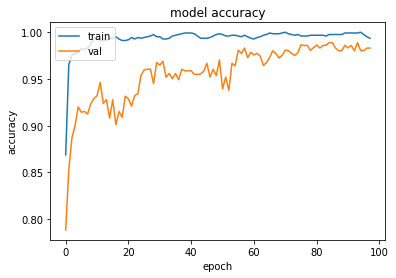

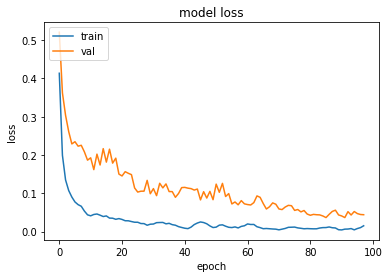

In [13]:
plot_history(history, mean_N=3, save=True, path='plots/', name='mobilenet')